#**Lab | Cleaning categorical data**

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

Instructions
1. Import the necessary libraries if you are starting a new notebook.
2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
3. What should we do with the customer_id column?
4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
numerical_df = customer_df.select_dtypes()
categorical_df = customer_df.select_dtypes()
5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [1]:
#Import the necessary libraries if you are starting a new notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the csv. Use the variable customer_df as customer_df = pd.read_csv()
customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
#What should we do with the customer_id column?
#Load the continuous and discrete variables into numericals_df and categorical_df variables, 
#for eg.: numerical_df = customer_df.select_dtypes() categorical_df = customer_df.select_dtypes()
customer_df.columns=[c.lower().replace(' ', '_') for c in customer_df.columns]
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [17]:
data_cat= customer_df.select_dtypes(include=["object", "datetime64"])
data_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [5]:
data_num= customer_df.select_dtypes(include=["float64","int64"])
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Plot every categorical variable. 
What can you see in the plots? 
Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. 

This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

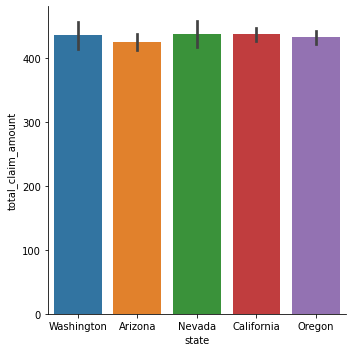

In [7]:
sns.catplot(data=customer_df, x="state", y="total_claim_amount",  kind="bar")

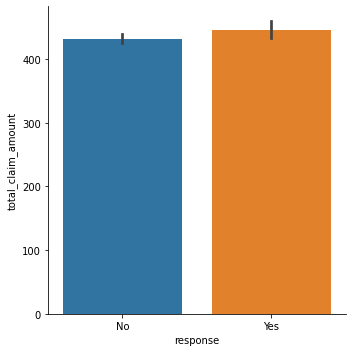

In [8]:
sns.catplot(data=customer_df, x="response", y="total_claim_amount",  kind="bar")

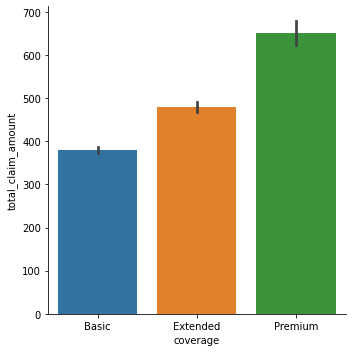

In [ ]:
sns.catplot(data=customer_df, x="coverage", y="total_claim_amount",  kind="bar")

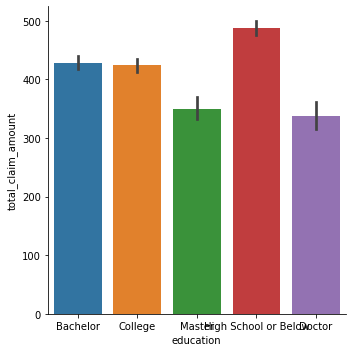

In [ ]:
sns.catplot(data=customer_df, x="education", y="total_claim_amount",  kind="bar")

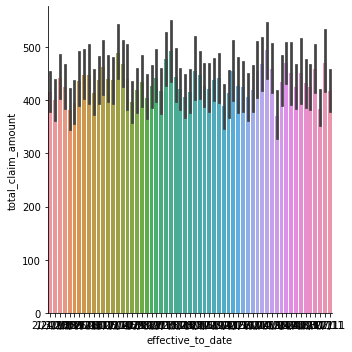

In [ ]:
sns.catplot(data=customer_df, x="effective_to_date", y="total_claim_amount",  kind="bar")

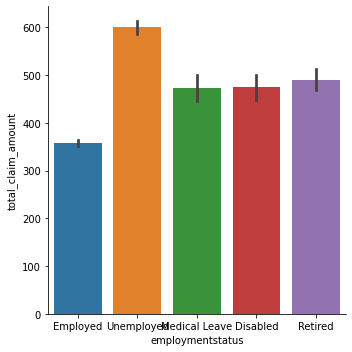

In [ ]:
sns.catplot(data=customer_df, x="employmentstatus", y="total_claim_amount",  kind="bar")

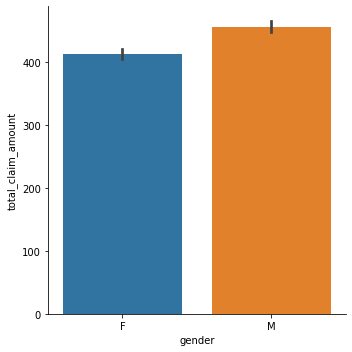

In [ ]:
sns.catplot(data=customer_df, x="gender", y="total_claim_amount",  kind="bar")

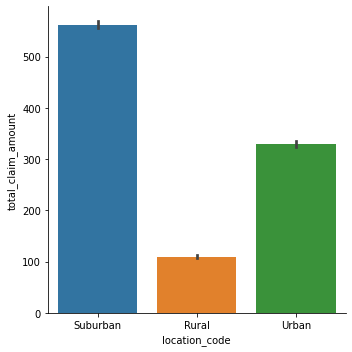

In [ ]:
sns.catplot(data=customer_df, x="location_code", y="total_claim_amount",  kind="bar")

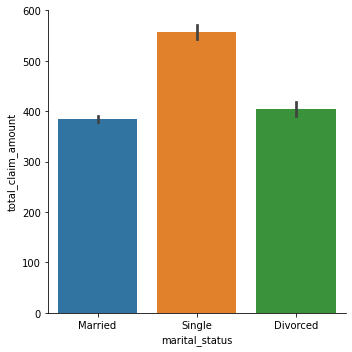

In [ ]:
sns.catplot(data=customer_df, x="marital_status", y="total_claim_amount",  kind="bar")

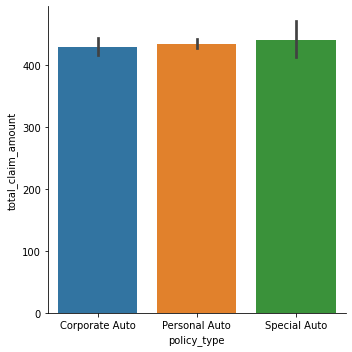

In [ ]:
sns.catplot(data=customer_df, x="policy_type", y="total_claim_amount",  kind="bar")

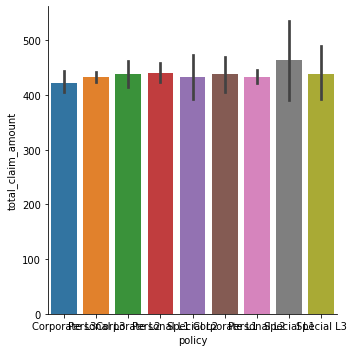

In [ ]:
sns.catplot(data=customer_df, x="policy", y="total_claim_amount",  kind="bar")

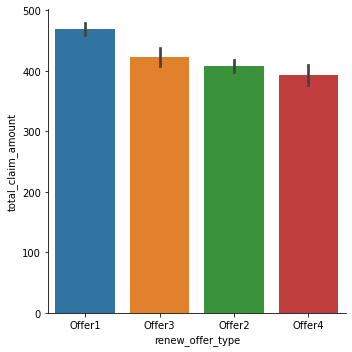

In [ ]:
sns.catplot(data=customer_df, x="renew_offer_type", y="total_claim_amount",  kind="bar")

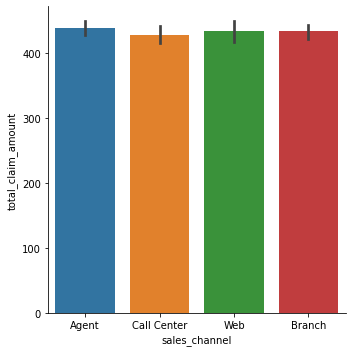

In [ ]:
sns.catplot(data=customer_df, x="sales_channel", y="total_claim_amount",  kind="bar")

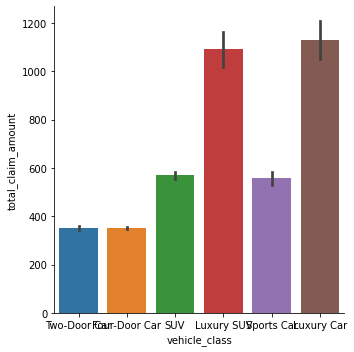

In [ ]:
sns.catplot(data=customer_df, x="vehicle_class", y="total_claim_amount",  kind="bar")

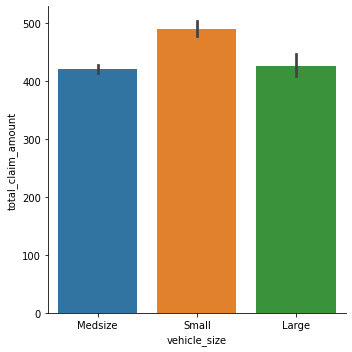

In [ ]:
sns.catplot(data=customer_df, x="vehicle_size", y="total_claim_amount",  kind="bar")

6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
for c in data_cat:
  value_counts=data_cat[c].value_counts()
  print('Columna:', c, value_counts)  

Columna: customer BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
Columna: state California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
Columna: response No     7826
Yes    1308
Name: response, dtype: int64
Columna: coverage Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Columna: education Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Columna: effective_to_date 1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161


In [21]:
#Empezamos con employmentstatus, reordenando las categorias
data_cat['employmentstatus'].value_counts()
vals=pd.DataFrame(data_cat['employmentstatus'].value_counts())
vals=vals.reset_index()
vals.columns=['employmentstatus','counts']
vals
     

,employmentstatus,counts
0,Employed,5698
1,Unemployed,2317
2,Medical Leave,432
3,Disabled,405
4,Retired,282


In [22]:
emp_status =vals[vals['counts']>2000]
emp_status =list(emp_status['employmentstatus'])
emp_status

['Employed', 'Unemployed']

In [23]:
def clean_empstatus(x):
  if x in emp_status:
    return x
  else:
    return 'other'

In [24]:
data_cat['employmentstatus']=list(map(clean_empstatus,data_cat['employmentstatus']))
data_cat['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
other         1119
Name: employmentstatus, dtype: int64

In [25]:
#Elegimos también education
vals2 = pd.DataFrame(data_cat['education'].value_counts())
vals2 = vals2.reset_index()
vals2 .columns = ['education','counts']
vals2 

,education,counts
0,Bachelor,2748
1,College,2681
2,High School or Below,2622
3,Master,741
4,Doctor,342


In [27]:
#me quedare solo con las  categorias  arriba de 2000 
emp_edu =vals2 [vals2 ['counts']>2000]
emp_edu =list(emp_edu['education'])
emp_edu

['Bachelor', 'College', 'High School or Below']

In [31]:
def clean_edu(x):
  if x in emp_edu:
    return x
  else:
    return 'Higher'

In [32]:
data_cat['education']=list(map(clean_edu, data_cat['education']))
data_cat['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Higher                  1083
Name: education, dtype: int64

In [33]:
#También elegimos  policy ya que tiene pocos valores
v3 = pd.DataFrame(data_cat['policy'].value_counts())
v3 = v3.reset_index()
v3.columns=['policy','counts']
v3
     

,policy,counts
0,Personal L3,3426
1,Personal L2,2122
2,Personal L1,1240
3,Corporate L3,1014
4,Corporate L2,595
5,Corporate L1,359
6,Special L2,164
7,Special L3,148
8,Special L1,66


In [34]:
#Me quedare sólo con los policy arriba de 1000 customers 
emp_pol =v3[v3['counts']>1000]
emp_pol =list(emp_pol['policy'])
emp_pol

['Personal L3', 'Personal L2', 'Personal L1', 'Corporate L3']

In [37]:
def clean_pol(x):
  if x in emp_pol:
    return x
  else:
    return 'Other'

In [38]:
data_cat['policy']=list(map(clean_pol,data_cat['policy']))
data_cat['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Other           1332
Personal L1     1240
Corporate L3    1014
Name: policy, dtype: int64

In [39]:
#ahora para vehicle class
v4 = pd.DataFrame(data_cat['vehicle_class'].value_counts())
v4 = v4.reset_index()
v4.columns = ['vehicle_class','counts']
v4

,vehicle_class,counts
0,Four-Door Car,4621
1,Two-Door Car,1886
2,SUV,1796
3,Sports Car,484
4,Luxury SUV,184
5,Luxury Car,163


In [40]:
#Me quedare sólo con los valores arriba de 1000 customers 
emp_veh = v4[v4['counts']>1000]
emp_veh = list(emp_veh['vehicle_class'])
emp_veh
     

['Four-Door Car', 'Two-Door Car', 'SUV']

In [41]:
def clean_veh(x):
  if x in emp_veh:
    return x
  else:
    return 'Other'
     

In [42]:
data_cat['vehicle_class']=list(map(clean_veh,data_cat['vehicle_class']))
data_cat['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Other             831
Name: vehicle_class, dtype: int64

In [44]:
data_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Other,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Other,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large
